
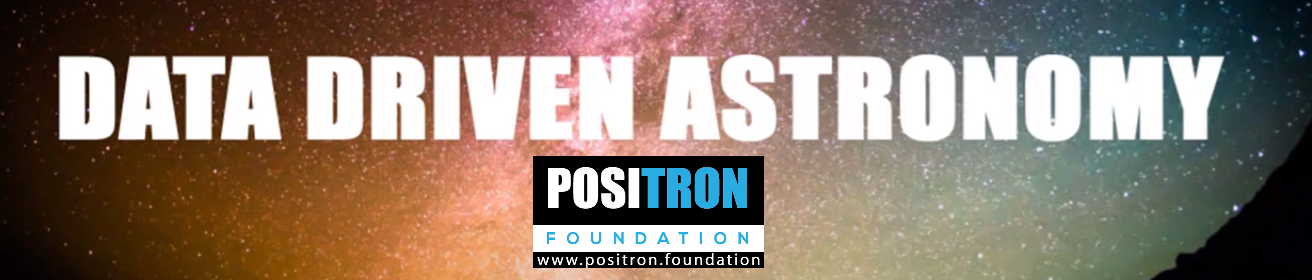




Welcome to **Data Driven Astronomy** Online course organized by **Positron Foundation**


# **Introduction to Image Analysis and Processing**

## **Initialization**

Do not change anthing in this section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
from astropy.visualization import make_lupton_rgb

# To improve Aesthetics of plots
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

In [2]:
# Do no change
!git clone https://github.com/Jack3690/DDA

Cloning into 'DDA'...
remote: Enumerating objects: 421, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 421 (delta 103), reused 37 (delta 37), pack-reused 271
Receiving objects: 100% (421/421), 51.18 MiB | 21.37 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [3]:
cd DDA/Week_1/data

/content/DDA/Week_1/data


In [4]:
ls

dss2ir.fits  puzzle_1.fits  puzzle_2.fits  puzzle_3.fits


## **FITS**

Flexible Image Transport System (FITS) is a digital file format useful for storage, transmission and processing of data: formatted as multi-dimensional arrays (for example a 2D image), or tables.

FITS is an open standard that is freely available for adoption, implementation and updates.

FITS is the most commonly used digital file format in astronomy.  

Running the code below, opens the fits file ("dss2ir.fits") and stores it. To learn more about FITS File Handling: [astropy.io.fits](https://docs.astropy.org/en/stable/io/fits/index.html#module-astropy.io.fits)

In [5]:
hdu = fits.open('dss2ir.fits')
hdu

The above open() function returns an object called as **HDU List**, which is a **List**  of Header Data Unit (HDU) objects, i.e. when a FITS file is opened, a `HDUList` object is returned.

This is the top-level component of the FITS file structure.  

Learn more about the FITS object by running the cell below. 

In [6]:
help(hdu)

Help on HDUList in module astropy.io.fits.hdu.hdulist object:

class HDUList(builtins.list, astropy.io.fits.verify._Verify)
 |  HDUList(hdus=[], file=None)
 |  
 |  HDU list class.  This is the top-level FITS object.  When a FITS
 |  file is opened, a `HDUList` object is returned.
 |  
 |  Method resolution order:
 |      HDUList
 |      builtins.list
 |      astropy.io.fits.verify._Verify
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, item)
 |      Returns `True` if ``item`` is an ``HDU`` _in_ ``self`` or a valid
 |      extension specification (e.g., integer extension number, extension
 |      name, or a tuple of extension name and an extension version)
 |      of a ``HDU`` in ``self``.
 |  
 |  __copy__(self)
 |      Return a shallow copy of an HDUList.
 |      
 |      Returns
 |      -------
 |      copy : `HDUList`
 |          A shallow copy of this `HDUList` object.
 |  
 |  __deepcopy__(self, memo=None)
 |  
 |  __delitem__(self, key)
 |     

In [7]:
hdu.info()

Filename: dss2ir.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     134   (600, 600)   float32   


A useful method in HDUList Class isHDUList.info(), which summarizes the content of the opened FITS file. 

The first element in HDU is the Primary HDU, i.e. `hdul[0]` is the primary HDU. 

Rest are secondary, if any.

Every Header Data Unit (HDU) normally has two components: 
1. Header 
2. Data array or table

In astropy these two components are accessed through, `"hdu.header"` and `"hdu.data"`

FITS image headers can contain information about one or more scientific coordinate systems that are overlaid on the image itself. Images contain an implicit Cartesian coordinate system that describes the location of each pixel in the image, but scientific uses usually require working in 'world' coordinates, for example the celestial coordinate system.

In [8]:
hdu[0].header

SIMPLE  =                    T / Written by SkyView Wed Jun 30 06:16:55 EDT 2021
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  600 / Width of image                                 
NAXIS2  =                  600 / Height of image                                
CRVAL1  =   202.46957500000002 / Reference longitude                            
CRVAL2  =    47.19525800000001 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                300.5 / X reference pixel                              
CRPIX2  =                300

In [9]:
data = hdu[0].data
type(data)

numpy.ndarray

**Exercise 1.1**
 
Write code to display the image data in the variable 'data'. The plot should have following features



1.   Grayscale colormap
2.   Title  : 'M 51 Galaxy'
3.   Origin : 'lower'



Text(0.5, 1.0, 'M 51 Galaxy\n')

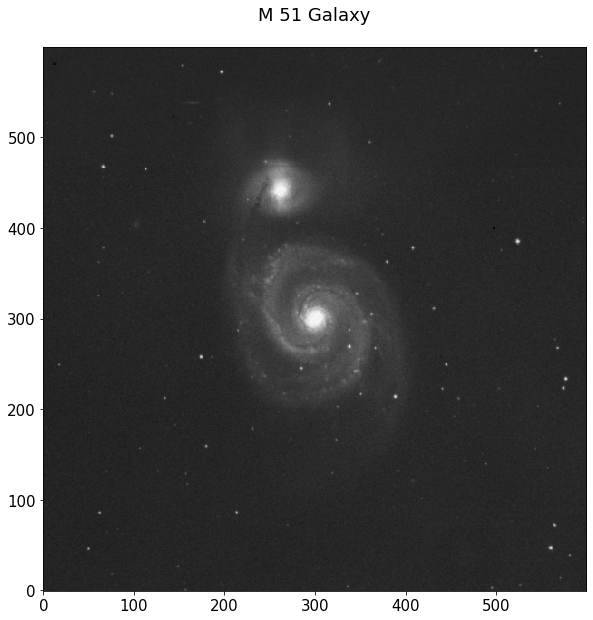

In [10]:
# 2 lines
plt.imshow(data, cmap='gray', origin='lower', interpolation='none')
plt.title( 'M 51 Galaxy\n')


## **Scaling or Stretch function**

Scaling is used to change the visual appearance of an image, to alter the quantity of information stored in a scene representation, or as a low-level preprocessor in multi-stage image processing chain which operates on features of a particular scale. You choose which “stretch function” or representation to use 

A logarithmic representation of the pixel values tends to suppress the bright parts of the image, i.e. the stars, and to enhance the fainter part, e.g. nebulosity. This can be desirable if the ‘faint stuff’ needs ‘a boost’, but a logarithmic stretch function can also reduce the contrast in an image, producing a lower dynamic range

Here's an example of sqrt scaling



Text(0.5, 1.0, 'Sqrt scaled M 51 Galaxy\n')

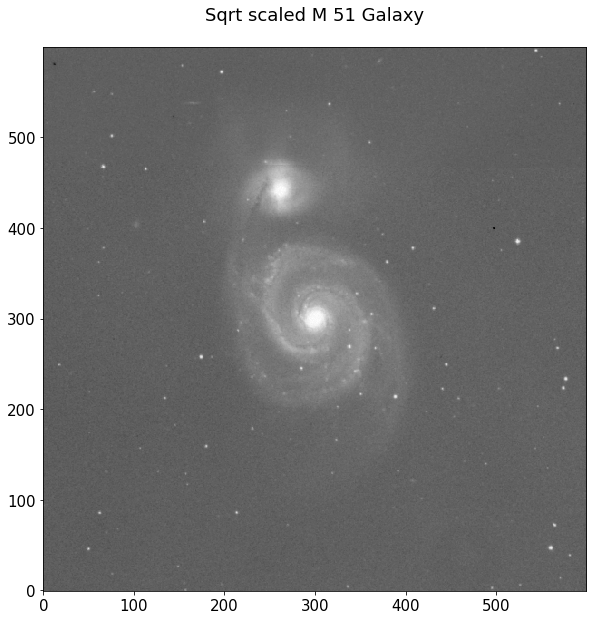

In [11]:
sqrt = np.sqrt(data)

# Display sqrt with cmap: gray, origin : lower and title : Sqrt scaled M 51 Galaxy.
# 2 lines
plt.imshow(sqrt, cmap='gray', origin='lower', interpolation='none')
plt.title( 'Sqrt scaled M 51 Galaxy\n')


**Exercise 1.2.a**

Complete scale function which takes 2D numpy array and scaling function name as input and returns scaled image. The function should have following scaling functions

1. Linear.
2. Square root. 
3. Logarithmic [Base 10]. ( Remember log 0 is indefinite, use log( 1+ data) )
4. asinh


In [12]:
def scale(data, func='linear'):
  data = data - data.min()  # makes all data Positive
  if func=='linear':
    return data

  elif func == 'log':
    # 1 line
    data=np.log10( 1+ data)
    return data
  elif func == 'sqrt':
    # 1 line
    data=np.sqrt(data)
    return data
  elif func == 'asinh':
    # 1 line
    data=np.arcsinh(data)
    return data

**Exercise 1.2.b**

Write a function which takes 2D array and normalization method as input and returns normalized array. The function should have following normalization method

1. Normalize data to the range [0,1]. Hint : Use min and max [Learn more](https://en.wikipedia.org/wiki/Normalization_(statistics))
2. Normalize data using mean and standard deviation


In [13]:
def norm(data,func='norm1'):
  # Complete the function
  if func=='norm1':
    norm_arr = (data - data.min() ) /( data.max() - data.min() )
    return norm_arr

  elif func=='norm2':
    norm_arr=(data-data.mean())/data.std()
    return norm_arr
   
  

## **RGB Composite Image**


The RGB colour model relates very closely to the way we perceive colour with the r, g and b receptors in our retinas. RGB uses additive colour mixing and is the basic colour model used in television or any other medium that projects colour with light. It is the basic colour model used in computers and for web graphics.

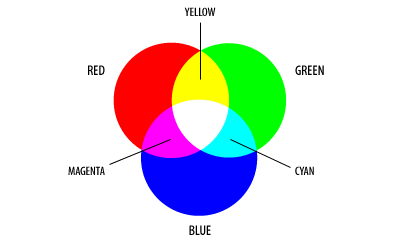


Images of astronomical objects are usually taken with electronic detectors such as a CCD (Charge Coupled Device). Similar detectors are found in normal digital cameras. Telescope images are nearly always greyscale, but nevertheless contain some colour information. An astronomical image may be taken through a colour filter. Different detectors and telescopes also usually have different sensitivities to different wavelengths.

Filters can either be broad-band (Wide) or narrow-band (Narrow). A broad-band filter lets a wide range of colours through, for instance the entire green or red area of the spectrum. A narrow-band filter typically only lets a small wavelength span through, thus effectively restricting the transmitted radiation to that coming from a given atomic transition, allowing astronomers to investigate individual atomic processes in the object.



### **Sloan Digital Sky Survey**

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. [Learn more](https://www.sdss.org/instruments/)

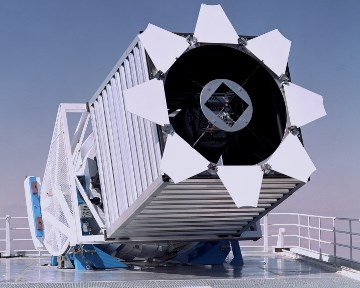

The SDSS camera has five filters, which together span the optical window. Each filter images a section of sky nearly, but not exactly, simultaneously (each filter is separated by 71.72 seconds). The filters always observe in the same time sequence: r, i, u, z and then g. A mnemonic for remembering the order is “robert is under ze gunn.”

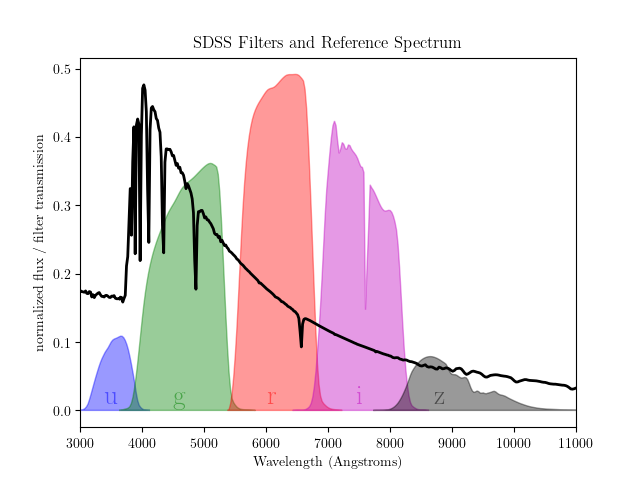

## **Skyview**

In the next exercise we will be using Skyview module from astroquery package to acquire r, g, and i filter images and use it to make RGB images. First let's install Astroquery package. ([Astroquery Documentation](https://astroquery.readthedocs.io/en/latest/))



In [14]:
!pip install astroquery --quiet

     |████████████████████████████████| 4.5 MB 4.9 MB/s 
     |████████████████████████████████| 832 kB 49.5 MB/s 
     |████████████████████████████████| 48 kB 4.3 MB/s 
     |████████████████████████████████| 4.0 MB 33.8 MB/s 


In [15]:
from astroquery.skyview import SkyView

The SkyView service offers a cutout service for a number of imaging surveys.It is a Virtual Observatory on the Net(at skyview.gsfc.nasa.gov) generating images of any part of the sky at wavelengths in all regimes from Radio to Gamma-Ray. 

In [16]:
SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

In [17]:
size = 400
paths = SkyView.get_images(position='M 63',radius=size*u.arcsec,pixels=512, survey=['SDSSg','SDSSr','SDSSi'])

Here position = 'M 63' refers to the name of the source. M 63 stands for 63rd source in the [Messier Catalog](https://en.wikipedia.org/wiki/Messier_object). For specifying a source in the sky you can either use their catalog names, for example : M 51, NGC 3690, manga 8515-1901 etc or use RA and Dec of the source. RA and Dec are coordinates of the [Equatorial Coordinate system](https://en.wikipedia.org/wiki/Equatorial_coordinate_system) similar to latitude and longitude geographical coordinate system.

radius = size*u.arcsec gives angular size of the source in arc seconds.

pixels = 512 sets the number of pixels in the output image.

survey = ['SDSSg','SDSSr','SDSSi'] returns data for g,r and i band of SDSS

We notice that SkyView.get_images returns a HDUList object

In [18]:
paths[0][0].header # First object in the list

SIMPLE  =                    T / Written by SkyView Fri Oct 28 16:20:09 EDT 2022
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  512 / Width of image                                 
NAXIS2  =                  512 / Height of image                                
CRVAL1  =              198.955 / Reference longitude                            
CRVAL2  =              42.0294 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                256.5 / X reference pixel                              
CRPIX2  =                256

**Exercise 1.3**

Complete the code to store the g, r, and i filter data in variable B, G, and R respectively. *It's convention to assign shortest wavelength to blue and longest wavelength to red.*

In [19]:
R = paths[2][0].data  # Example 
# Complete the code
G = paths[1][0].data
B = paths[0][0].data

**Exercise 1.4.a**

Write code for applying following operations on filter data

Step 1. linear scale

Step 2. Normalize to [0,1]

For each filter data and stack the 3 filters to create a 3D array of shape ( 512,512,3). Hint : Use np.stack

In [20]:
# Use the functions you defined earlier
R_norm = norm(scale(R,func = 'linear'), 'norm1')

# Complete the code
G_norm = norm(scale(G,func = 'linear'), 'norm1')
B_norm =norm(scale(B,func = 'linear'), 'norm1')
RGB    = np.stack([R_norm, G_norm, B_norm], axis = 2)                              # Stacked 3D array


# Do not change this line
assert RGB.shape == (512,512,3)

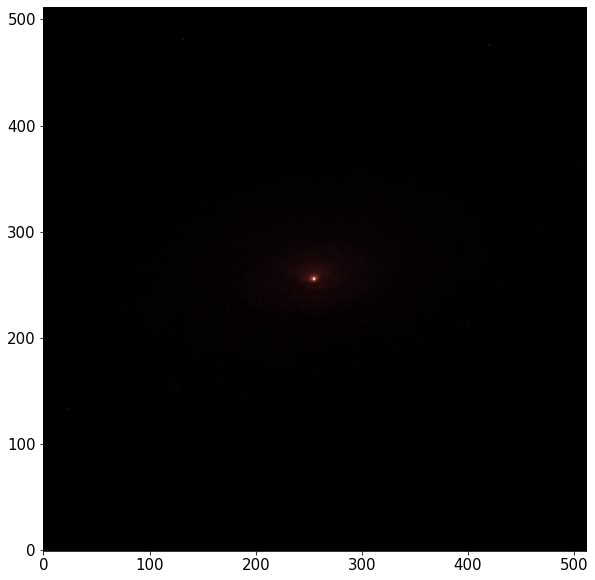

In [21]:
# Display the image with origin : lower
# 1 line
plt.imshow(RGB, origin='lower', interpolation='none')


For displaying 3D array as RGB image using matplotlib, the data of each 2D filter is expected to be in the range [0,1], thus we normalized the data to [0,1]

**Exercise 1.4.b**

Step 1. arcsinh scale

Step 2. Normalize to [0,1]

For each filter data and stack the 3 filters to create a 3D array of shape ( 512,512,3 ). Hint : Use np.stack

In [22]:
# Complete the code
R_norm = norm(scale(R,func = 'asinh'), 'norm1')
G_norm =norm(scale(G,func = 'asinh'), 'norm1')
B_norm = norm(scale(B,func = 'asinh'), 'norm1')
RGB    = np.stack([R_norm, G_norm, B_norm], axis = 2)                          # Stacked 3D array

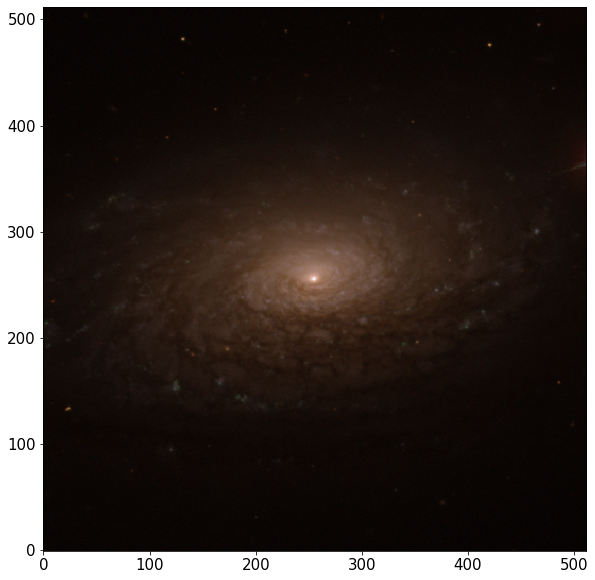

In [23]:
# Display the image
plt.imshow(RGB, origin='lower', interpolation='none')


## **RGB Image using astropy**

Astropy.visualization has a function make_lupton_rgb which returns a Red/Green/Blue color image from up to 3 images using an asinh stretch. The input images can be int or float, and in any range or bit-depth. [Learn more](https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html)

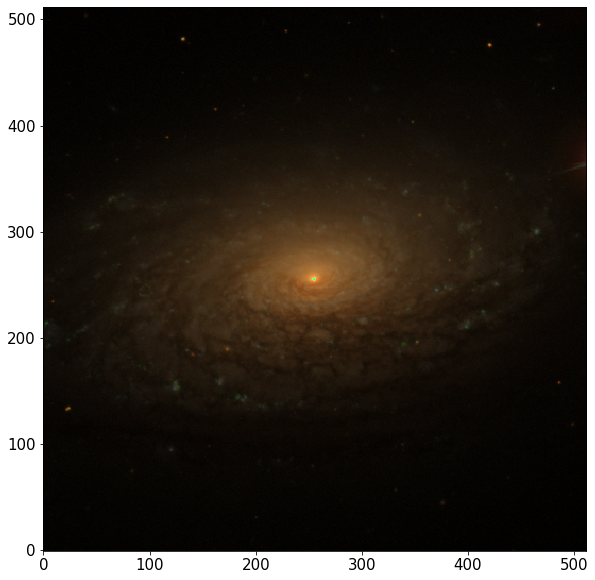

In [24]:
RGB_as = make_lupton_rgb(R,G,B)
# Display RGB_as
plt.imshow(RGB_as, origin='lower', interpolation='none')


# **Puzzle I**

**Step 1**

Write code to open the FITS file named 'puzzle_1.fits and store the data in a variable (say RGB1 )and display the RGB image


In [25]:
hdu= fits.open('puzzle_1.fits')
RGB1 = hdu[0].data

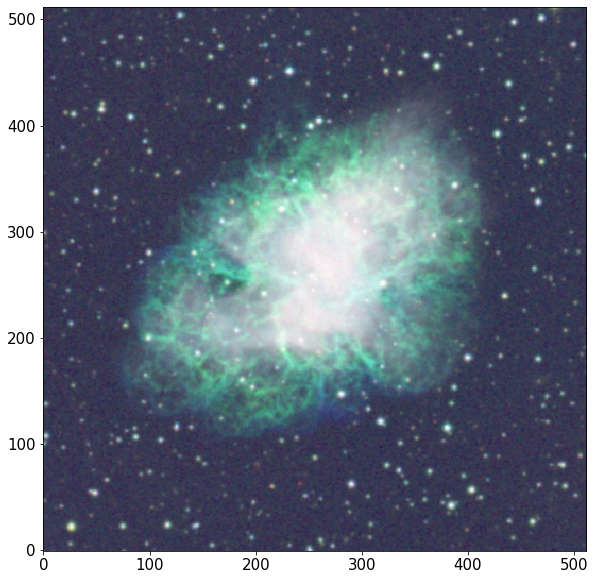

In [26]:
# Display RGB1

plt.imshow(RGB1, origin='lower', interpolation='none')

**Step 2**

Write code to make RGB image  of 'SN 1054' with 'sqrt' scaling,and radius equal to 9 arcminutes and 512 pixels using surveys 'DSS2 IR', 'DSS2 Red' and 'DSS2 Blue'. Let the RGB image be stored in a variable named RGB2

In [27]:
size = 540
paths = SkyView.get_images(position='SN 1054',radius=size*u.arcsec,pixels=512, survey=['DSS2 IR', 'DSS2 Red', 'DSS2 Blue'])

In [28]:
# Use convention of longest wavelenth in R and shortest in B
R = paths[2][0].data  
G = paths[1][0].data
B = paths[0][0].data

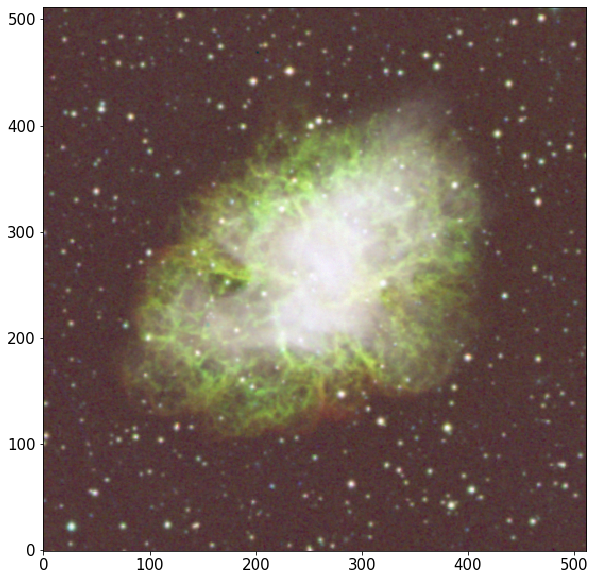

In [29]:
# Complete the code
R_norm = norm(scale(R,func = 'sqrt'), 'norm1')
G_norm = norm(scale(G,func = 'sqrt'), 'norm1')
B_norm =norm(scale(B,func = 'sqrt'), 'norm1')
RGB2   =  np.stack([R_norm, G_norm, B_norm], axis = 2)                   # Stacked 3D array

# Display RGB2
plt.imshow(RGB2, origin='lower', interpolation='none')

Make a new 3D array which stores the difference between RGB2 and RGB1. Plot the G band data of this new array.

In [30]:
RGB_diff =RGB2-RGB1

In [31]:
# Slice RGB_diff to select G band
G_diff =  RGB_diff[:,:,1]

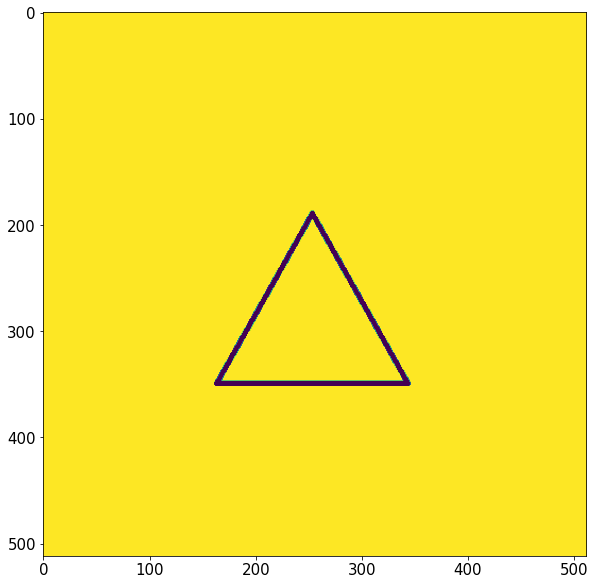

In [32]:
# Display G_diff
plt.imshow(G_diff)

Save the plot for submission and later reference

# **Saving FITS image**
Saving the final step as a fits file with name 'puzzle_1_solution.fits'

In [33]:
hdu = fits.PrimaryHDU(G_diff)
hdul = fits.HDUList(hdu)
hdul.writeto('puzzle_1_solution.fits', overwrite = True)